Descarga del conjunto de datos con la ruta alternativa


In [25]:
import gdown
url= 'https://drive.google.com/file/d/1HZcEAbfRQQSgfMB_SEx3Q3vqkqxzcjk-/view?usp=drive_link'
output= 'Camioneta furgon Iveco Daily.json'
gdown.download(url, output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1HZcEAbfRQQSgfMB_SEx3Q3vqkqxzcjk-
To: /content/Camioneta furgon Iveco Daily.json
100%|██████████| 2.25M/2.25M [00:00<00:00, 149MB/s]


'Camioneta furgon Iveco Daily.json'

# Carga del conjunto de datos y exploracion utilizando las librerias de python

In [26]:
import pandas as pd
import json

# Carga del archivo JSON
with open('Camioneta furgon Iveco Daily.json', 'r') as f:
    data = json.load(f)

# Normalizar la seccion del conjunto de datos 'gral'
df_gral = pd.json_normalize(data['gral'])


# Imprimo mi data set
print(df_gral.head())
print(df_gral.info())

   object                      from                        to mins velmax  \
0    3943  2024-06-08T03:00:00.000Z  2024-06-16T01:25:02.905Z    0     92   

  type dvcType    _v objType                              hash  kmRec  \
0  can     BCE  next      18  903fca6541a0c5c728fe263109714425  118.5   

   engOnSec  motionTime  canKmRec  canConsL  canL100Km  
0     56548       16402       120        23       19.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   object      1 non-null      int64  
 1   from        1 non-null      object 
 2   to          1 non-null      object 
 3   mins        1 non-null      object 
 4   velmax      1 non-null      object 
 5   type        1 non-null      object 
 6   dvcType     1 non-null      object 
 7   _v          1 non-null      object 
 8   objType     1 non-null      object 
 9   hash        1 non-null     

In [27]:
# Normalizar la seccion del conjunto de datos 'trips'
df_trips = pd.json_normalize(data['trips'])
df_trips.head()
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            62 non-null     object 
 1   start           62 non-null     int64  
 2   end             62 non-null     int64  
 3   events          32 non-null     object 
 4   from.lat        31 non-null     float64
 5   from.lng        31 non-null     float64
 6   to.lat          31 non-null     float64
 7   to.lng          31 non-null     float64
 8   lat             31 non-null     float64
 9   lng             31 non-null     float64
 10  idleTime        31 non-null     float64
 11  fuelEnd         30 non-null     object 
 12  status          31 non-null     object 
 13  dir             31 non-null     object 
 14  kmRec           30 non-null     float64
 15  engOnSec        30 non-null     float64
 16  motionTime      30 non-null     float64
 17  canKmRec        30 non-null     float

In [28]:
# Normalizar la seccion del conjunto de datos 'details'
df_details = pd.json_normalize(data['details'])
df_details.head()
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1858 non-null   int64  
 1   bat          1858 non-null   float64
 2   km           1858 non-null   float64
 3   engOn        1858 non-null   bool   
 4   evDesc       1858 non-null   object 
 5   dir          1858 non-null   object 
 6   lat          1857 non-null   float64
 7   lng          1857 non-null   float64
 8   speed        1857 non-null   float64
 9   heading      1857 non-null   float64
 10  wheel_speed  1619 non-null   float64
 11  total_fuel   1619 non-null   float64
 12  can_fls      1619 non-null   float64
 13  can_taho     1619 non-null   float64
 14  can_mileage  1619 non-null   float64
 15  eng_temp     1619 non-null   float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 219.7+ KB


# Exploracion del data set 'details' y limpieza de datos nulos.
En este caso por la cantidad de entradas del data set se opto por la decision

* El data set con el cual se desarrollara el modelo es 'details'. Al ser el mas completo es mas conveniente trabajar con estos datos.
* En este caso en el tratamiento de nulos y por la cantidad de entradas del data set se optó por la decision de borrar los datos faltantes.  
  



In [29]:
df_details.describe()
df_details.isna().sum()
dffinal= df_details.dropna()
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1619 entries, 5 to 1855
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1619 non-null   int64  
 1   bat          1619 non-null   float64
 2   km           1619 non-null   float64
 3   engOn        1619 non-null   bool   
 4   evDesc       1619 non-null   object 
 5   dir          1619 non-null   object 
 6   lat          1619 non-null   float64
 7   lng          1619 non-null   float64
 8   speed        1619 non-null   float64
 9   heading      1619 non-null   float64
 10  wheel_speed  1619 non-null   float64
 11  total_fuel   1619 non-null   float64
 12  can_fls      1619 non-null   float64
 13  can_taho     1619 non-null   float64
 14  can_mileage  1619 non-null   float64
 15  eng_temp     1619 non-null   float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 204.0+ KB


# Análisis de correlación

In [30]:
#ver las correlaciones en mi df
# Calcular las correlaciones con algunas columnas seleccionadas
correlation_matrix = dffinal[['km', 'speed', 'total_fuel','wheel_speed','can_taho']].corr()

# Matrriz de correlacion
print(correlation_matrix)



                   km     speed  total_fuel  wheel_speed  can_taho
km           1.000000 -0.005945    0.999122    -0.033750 -0.086710
speed       -0.005945  1.000000   -0.003360     0.920625  0.503919
total_fuel   0.999122 -0.003360    1.000000    -0.030699 -0.083808
wheel_speed -0.033750  0.920625   -0.030699     1.000000  0.717962
can_taho    -0.086710  0.503919   -0.083808     0.717962  1.000000


# Preparacion de los datos para los modelos y entrenamiento de los mismos
* SVM
* Linear Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [57]:
features = ['km',  'speed', 'can_taho']
target = 'total_fuel'

# Dividir los data sets en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dffinal[features], dffinal[target], test_size=0.2, random_state=42)


# Creación el Modelo de regresion Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Creacion del modelo  Support Vector Machine model
svr = SVR()
svr.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_reg.predict(X_test)
y_pred_svr = svr.predict(X_test)

#Print the results
print("Regresion Lineal:")
print(f"Prediccion de Consumo de Combustible : {y_pred_lin}")
print("Consumo de combustible actual:", y_test.tolist())

print("\nSupport Vector Machine:")
print(f"Prediccion de Consumo de Combustible: {y_pred_svr}")
print("Consumo de combustible actual", y_test.tolist())

Regresion Lineal:
Prediccion de Consumo de Combustible : [8330.22052638 8335.17644977 8351.16118676 8336.31674356 8347.47599677
 8345.28388783 8351.51128368 8339.83522262 8341.27526917 8331.85157829
 8337.00871408 8340.24200676 8337.92284066 8328.94384259 8336.1420916
 8339.05105227 8334.31302833 8331.75207559 8339.89855487 8332.28557815
 8332.47673577 8331.39652184 8331.45538874 8334.50341519 8348.2002814
 8333.72773079 8345.13035147 8335.17840871 8329.53256189 8351.12917205
 8339.66538677 8332.59763892 8338.78314231 8336.1792783  8329.03690643
 8330.11595951 8348.60023403 8350.87805259 8343.69297816 8334.71284836
 8334.82565823 8338.44362287 8340.1294424  8335.24331926 8351.08731638
 8345.26937791 8341.01959365 8350.00768415 8328.96766567 8331.99241141
 8329.04810495 8347.48655457 8334.26723765 8342.21777743 8349.39763797
 8335.45209715 8329.44124573 8343.61863643 8346.12570521 8349.73642345
 8336.83357109 8330.59753705 8335.90773786 8348.33753795 8338.24871674
 8337.79264147 8342.48

# Visualizacion de los modelos

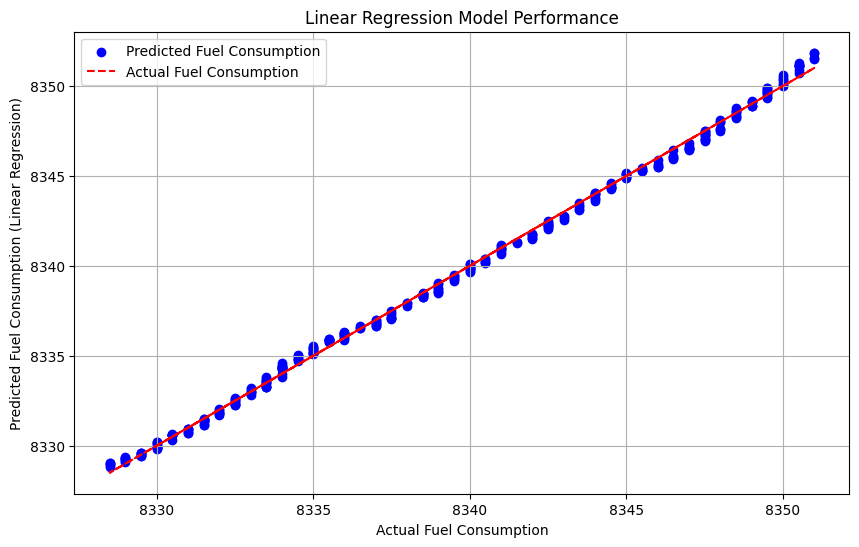

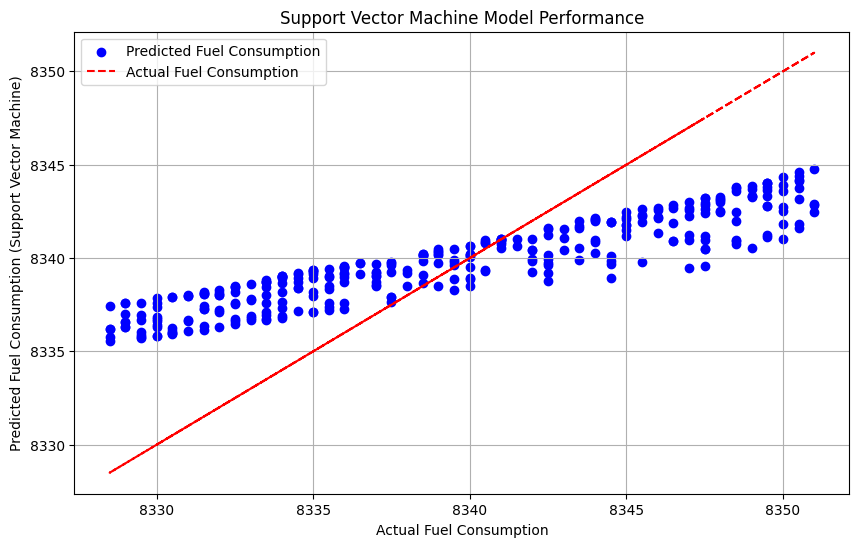

In [58]:
# Plot actual vs prediccion de consumo de combustible por el modelo de Regresion Lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted Fuel Consumption')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption (Linear Regression)')
plt.title('Linear Regression Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs prediccion de consumo de combustible por el modelo de support vector machine
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted Fuel Consumption')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption (Support Vector Machine)')
plt.title('Support Vector Machine Model Performance')
plt.legend()
plt.grid(True)
plt.show()

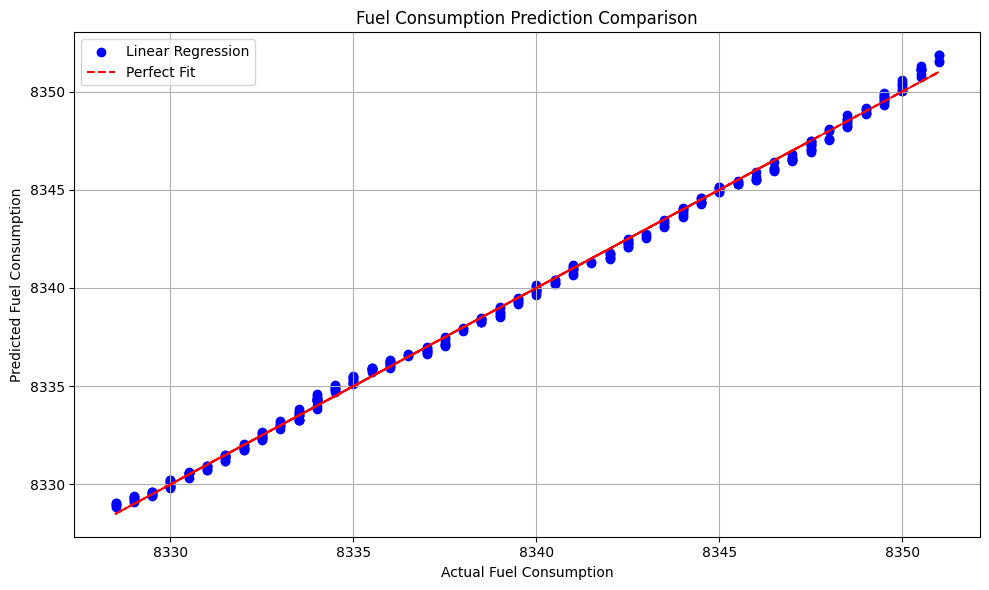

In [61]:
import matplotlib.pyplot as plt
import numpy as np

#Creacion de un grafico de dispersion acerca del consumo real vs la prediccion
y_true = y_test  # Actual consumo de combustible
y_pred_linear = lin_reg.predict(X_test)
y_pred_svm = y_pred_svr

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Regresion Lineal Resultados
plt.scatter(y_true, y_pred_linear, label='Linear Regression', color='blue')
plt.plot(y_true, y_true, linestyle='--', color='red', label='Perfect Fit')



#Labels
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Fuel Consumption Prediction Comparison')
plt.legend()

#Mostrar el grafico
plt.grid(True)
plt.tight_layout()
plt.show()



# Evaluacion del modelo con sus metricas
El modelo de regresion lineal es el que mejor se ajusta dado que en la grafica el modelo SVM tiene resultados muy alejados a lo real.
* MSE = 0.080698: Este valor es relativamente bajo, lo que sugiere que, en promedio, las predicciones del modelo están bastante cerca de los valores reales.
* MAE = 0.228382: Un valor bajo de MAE también indica una buena precisión del modelo.
* R² = 0.998205: Este valor extremadamente cercano a 1 indica que el modelo explica casi el 100% de la variabilidad en los datos de prueba. Es decir, el modelo se ajusta muy bien a los datos y hace predicciones muy precisas

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


try:
  # Calculate metrics
  mse_linear = mean_squared_error(y_test, y_pred_linear)
  mae_linear = mean_absolute_error(y_test, y_pred_linear)
  r2_linear = r2_score(y_test, y_pred_linear)

  print("MSE:", mse_linear)
  print("MAE:", mae_linear)
  print("R2:", r2_linear)
except ValueError as e:
  print("Error:", e)



MSE: 0.08069823097021826
MAE: 0.22838245539583954
R2: 0.998205449695976
